<a href="https://colab.research.google.com/github/kusalsai/Ayinala_INFO5731_Spring2025/blob/main/kusal_AyinalaINFO_assignment4_5731.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
newsgroups_train = fetch_20newsgroups(subset='train')
from pprint import pprint
pprint(list(newsgroups_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
num_samples = 2000
random_indices = np.random.choice(len(newsgroups_train.data), num_samples, replace=False)

# Select the random 2000 rows from the dataset
random_data = [newsgroups_train.data[i] for i in random_indices]
random_target = [newsgroups_train.target[i] for i in random_indices]

# Print out the random categories for the sampled data
random_target_names = [newsgroups_train.target_names[target] for target in random_target]


In [ ]:
df=random_target_names
df


['rec.sport.hockey',
 'comp.sys.ibm.pc.hardware',
 'comp.windows.x',
 'comp.sys.mac.hardware',
 'talk.politics.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.graphics',
 'rec.sport.baseball',
 'comp.graphics',
 'rec.sport.hockey',
 'alt.atheism',
 'alt.atheism',
 'talk.politics.mideast',
 'comp.os.ms-windows.misc',
 'sci.electronics',
 'sci.electronics',
 'rec.motorcycles',
 'comp.os.ms-windows.misc',
 'rec.autos',
 'talk.politics.mideast',
 'talk.politics.guns',
 'comp.sys.ibm.pc.hardware',
 'sci.space',
 'misc.forsale',
 'talk.religion.misc',
 'comp.os.ms-windows.misc',
 'sci.space',
 'rec.sport.hockey',
 'talk.politics.mideast',
 'sci.electronics',
 'rec.autos',
 'sci.crypt',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.ibm.pc.hardware',
 'talk.religion.misc',
 'alt.atheism',
 'sci.crypt',
 'sci.med',
 'sci.med',
 'alt.atheism',
 'rec.motorcycles',
 'sci.space',
 'soc.religion.christian',
 'rec.autos',
 'comp.windows.x',
 'talk.politics.misc',
 'sci.space',
 'misc.forsale',
 'talk.politics.m

In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd # Import pandas

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\W+', ' ', text.lower())
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 3]
    return " ".join(tokens)

# Convert the list to a DataFrame with a 'category' column
df = pd.DataFrame(df, columns=['category'])
df['cleaned_text'] = df['category'].apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd # Import pandas
from gensim.corpora.dictionary import Dictionary
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\W+', ' ', text.lower())
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 3]
    return " ".join(tokens)

# Convert the list to a DataFrame with a 'category' column
df = pd.DataFrame(df, columns=['category'])
df['cleaned_text'] = df['category'].apply(preprocess)

# Create a list of tokenized documents
tokenized_docs = [doc.split() for doc in df['cleaned_text']]

# Create a Gensim dictionary
dictionary = Dictionary(tokenized_docs)

# Create the bag-of-words representation
bow = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Coherence score in topic modeling to measure how interpretable the topics are to humans.
# Find the coherence score with a different number of topics
for i in range(1,11):
    lsi = LsiModel(bow, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=lsi, texts=tokenized_docs, dictionary=dictionary, coherence='c_v') #texts should be tokenized_docs
    coherence_score = coherence_model.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Coherence score with 1 clusters: 0.7754732225844256
Coherence score with 2 clusters: 0.7679901364090195
Coherence score with 3 clusters: 0.7814663322433716
Coherence score with 4 clusters: 0.779915847088133
Coherence score with 5 clusters: 0.7790045347149923
Coherence score with 6 clusters: 0.7733927273351742
Coherence score with 7 clusters: 0.7731526822569669
Coherence score with 8 clusters: 0.7720729646913245
Coherence score with 9 clusters: 0.7700174883674635
Coherence score with 10 clusters: 0.7655837325663402


In [ ]:
import matplotlib.pyplot as plt
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel # Import gensim's LDA model
from gensim.models import LsiModel  # Import LsiModel from gensim.models
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD

In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd  # Import pandas
from gensim.corpora.dictionary import Dictionary
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import gensim  # Import gensim

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def preprocess(text):
    text = re.sub(r'\W+', ' ', text.lower())
    tokens = text.split()
    tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words and len(word) > 3
    ]
    return " ".join(tokens)


# Convert the list to a DataFrame with a 'category' column
df = pd.DataFrame(random_target_names, columns=['category'])  # Modified
df['cleaned_text'] = df['category'].apply(preprocess)

# Create a list of tokenized documents
tokenized_docs = [doc.split() for doc in df['cleaned_text']]

# Create a Gensim dictionary
dictionary = Dictionary(tokenized_docs)

# Create the bag-of-words representation
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]


def compute_coherence_values(model_type, texts, dictionary, corpus, start=2, limit=15, step=1):
    coherence_scores = []
    for k in range(start, limit, step):
        if model_type == 'lda':
            model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42, passes=10)
        elif model_type == 'lsa':
            model = gensim.models.LsiModel(corpus=corpus, id2word=dictionary, num_topics=k)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_scores.append((k, coherencemodel.get_coherence()))
    return coherence_scores


lda_coherence = compute_coherence_values('lda', tokenized_docs, dictionary, corpus)
lsa_coherence = compute_coherence_values('lsa', tokenized_docs, dictionary, corpus)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


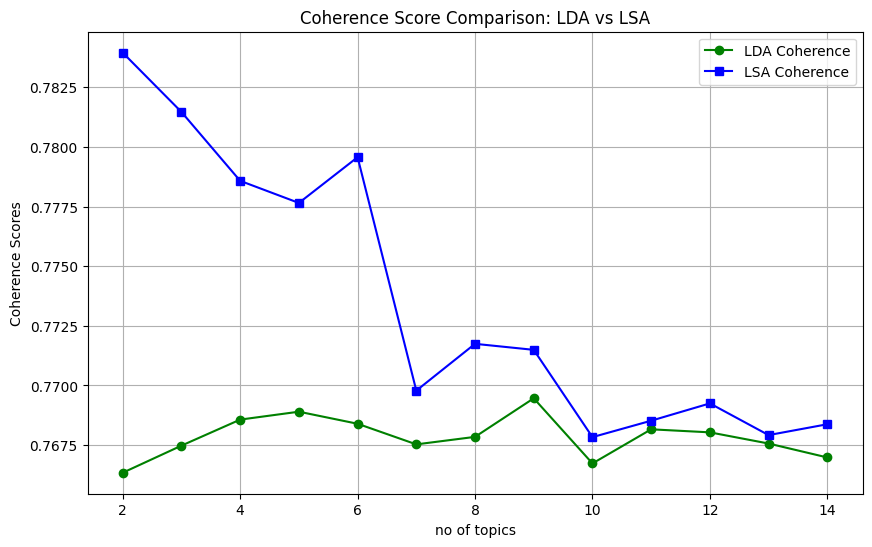

In [ ]:
import matplotlib.pyplot as plt

# Unpack the scores
lda_values, lda_scores = zip(*lda_coherence)
lsa_values, lsa_scores = zip(*lsa_coherence)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lda_values, lda_scores, marker='o', label='LDA Coherence', color='green')
plt.plot(lsa_values, lsa_scores, marker='s', label='LSA Coherence', color='blue')
plt.xlabel("no of topics")
plt.ylabel("Coherence Scores")
plt.title("Coherence Score Comparison: LDA vs LSA")
plt.legend()
plt.grid(True)
plt.show()



LSA

In [ ]:
best_lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=10)

topics = best_lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Topic {idx+1}: {topic}")


Topic 1: 0.393*"comp" + 0.391*"window" + 0.204*"misc" + 0.001*"religion" + 0.001*"talk" + 0.001*"sport" + 0.001*"hockey" + 0.001*"electronics" + 0.001*"christian" + 0.001*"forsale"
Topic 2: 0.179*"crypt" + 0.177*"graphic" + 0.176*"comp" + 0.161*"auto" + 0.151*"religion" + 0.150*"christian" + 0.001*"motorcycle" + 0.001*"hardware" + 0.000*"window" + 0.000*"misc"
Topic 3: 0.332*"comp" + 0.331*"hardware" + 0.191*"motorcycle" + 0.139*"atheism" + 0.001*"space" + 0.000*"window" + 0.000*"misc" + 0.000*"forsale" + 0.000*"sport" + 0.000*"hockey"
Topic 4: 0.213*"talk" + 0.178*"sport" + 0.152*"politics" + 0.131*"misc" + 0.092*"hockey" + 0.086*"baseball" + 0.081*"mideast" + 0.062*"religion" + 0.001*"christian" + 0.000*"atheism"
Topic 5: 0.182*"space" + 0.162*"electronics" + 0.133*"misc" + 0.133*"forsale" + 0.129*"politics" + 0.129*"talk" + 0.128*"gun" + 0.000*"religion" + 0.000*"motorcycle" + 0.000*"atheism"


# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

In [ ]:
!pip uninstall numpy -y
!pip install numpy==1.23.5


Found existing installation: numpy 2.2.4
Uninstalling numpy-2.2.4:
  Successfully uninstalled numpy-2.2.4
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is in

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



k = 10
# Assuming 'analyzed_abstracts.csv' is in the current directory
df = pd.read_csv('analyzed_abstracsts.csv', usecols=['abstracts'])
abstracts = df.abstracts.to_list()  # Define 'abstracts' here
df.head()

,abstracts
0,present fashionmnist new dataset comprising x ...
1,tensorflow machine learning system operates la...
2,tensorflow interface expressing machine learni...
3,goal precipitation nowcasting predict future r...
4,present open graph benchmark ogb diverse set c...


In [ ]:
!pip install numpy==1.24.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 47.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 w

In [ ]:
!pip install --upgrade jax jaxlib

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 MB 6.5 MB/s eta 0:00:00
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.5.1
    Uninstalling jaxlib-0.5.1:
      Successfully uninstalled jaxlib-0.5.1
  Attempting uninstall: jax
    Found existing installation: jax 0.5.2
    Uninstalling jax-0.5.2:
      Successfully uninstalled jax-0.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<

In [ ]:
!pip install numpy==1.25.2 --force-reinstall


  Using cached numpy-1.25.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.25.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.


In [ ]:
from bertopic import BERTopic
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

In [ ]:
from bertopic import BERTopic
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
import pandas as pd

# Assuming 'analyzed_abstracts.csv' is in the current directory or accessible
df = pd.read_csv('analyzed_abstracsts.csv', usecols=['abstracts'])  # Replace 'analyzed_abstracts.csv' with the actual file name if different
abstracts = df.abstracts.to_list()

# Initialize and train the BERTopic model
topic_model = BERTopic(nr_topics=10) # You can change the number of topics if needed
topics, probs = topic_model.fit_transform(abstracts)

# Now you can get the topic info
topic_model.get_topic_info()

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,Topic,Count,Name,Representation,Representative_Docs
0,-1,173,-1_learning_machine_algorithm_data,"[learning, machine, algorithm, data, method, p...",[machine learning one field modern computing w...
1,0,370,0_learning_machine_data_model,"[learning, machine, data, model, algorithm, me...",[deep learning demonstrated tremendous success...
2,1,70,1_attack_data_model_learning,"[attack, data, model, learning, privacy, machi...",[machine learning ml model may deemed confiden...
3,2,22,2_text_sentiment_classification_document,"[text, sentiment, classification, document, te...",[consider problem classifying document topic o...
4,3,19,3_model_interpretability_interpretable_explana...,"[model, interpretability, interpretable, expla...",[machine learning system becoming increasingly...
5,4,16,4_molecular_energy_molecule_chemical,"[molecular, energy, molecule, chemical, potent...",[accurate reliable prediction property molecul...
6,5,14,5_distributed_graphlab_data_abstraction,"[distributed, graphlab, data, abstraction, fra...",[designing implementing efficient provably cor...
7,6,14,6_quantum_classical_circuit_learning,"[quantum, classical, circuit, learning, machin...",[pennylane python software framework optimizat...
8,7,12,7_translation_sequence_sentence_nmt,"[translation, sequence, sentence, nmt, model, ...",[neural machine translation nmt making good pr...
9,8,11,8_tensorflow_pytorch_library_machine,"[tensorflow, pytorch, library, machine, theano...",[tensorflow interface expressing machine learn...


In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart(top_n_topics=10, n_words = 40, width = 300, height = 300)

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=10, width = 700, height = 700)

Based on coherence score


In [ ]:
pip install gensim

In [ ]:
pip install --upgrade h5py

In [ ]:
#Create BERTopic model with the optimal K
optimal_k = 10
final_topic_model1 = BERTopic(nr_topics=optimal_k)
new_topics, new_ = final_topic_model1.fit_transform(abstracts)

In [ ]:
def compute_coherence(texts, min_k=2, max_k=20):
    coherence_scores = []
    for k in range(min_k, max_k + 1):
        model = BERTopic(nr_topics=k)
        topics, _ = model.fit_transform(texts)
        topic_words = [list(dict(model.get_topic(i)).keys()) for i in range(k)]

        # Create dictionary and corpus for coherence calculation
        dictionary = Dictionary([words for words in topic_words])
        corpus = [dictionary.doc2bow(words) for words in topic_words]

        # Calculate coherence score using the c_v metric
        coherence_model = CoherenceModel(topics=topic_words, texts=[text.split() for text in texts],
                                         dictionary=dictionary, coherence='c_v')
        coherence_scores.append((k, coherence_model.get_coherence()))

    return coherence_scores

In [ ]:
# Train BERTopic model with the optimal K
topic_model = BERTopic(nr_topics=optimal_k)
topics, probs = topic_model.fit_transform(abstracts)  # Pass 'abstracts' to the function

# Interpret the topics by examining their top words
print("\nTopic Interpretation (Top Words):")
for topic_id in range(optimal_k):
    print(f"Topic {topic_id}:")
    print(topic_model.get_topic(topic_id))
    print("\n")

# Visualize the topics
topic_model.visualize_topics()
topic_model.visualize_barchart(top_n_topics=12, n_words=10, width=350, height=350)
topic_model.visualize_hierarchy(top_n_topics=12, width=700, height=700)

In [ ]:
final_topic_model1.visualize_topics()

In [ ]:
topic_model.visualize_barchart(top_n_topics=12, n_words = 10, width = 350, height = 350)

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=12, width = 700, height = 700)

# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [ ]:
import pandas as pd
import random
from sklearn.datasets import fetch_20newsgroups

# Load dataset and sample 2000 rows
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
sampled_data = random.sample(data.data, 2000)

# Convert to DataFrame
df = pd.DataFrame(sampled_data, columns=['text'])
print(df.head())


                                                text
0  My brother purchased baseball tickets for Texa...
1  \n\nPeter,  there's a radiosity package ahead....
2  I am looking for statistics on the prevalence ...
3  \nAbout as good as Mussina's. better than Sutc...
4                                 \n\nYes me, why?\n


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the missing punkt_tab data

# Preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 3]
    return " ".join(tokens)

# Apply preprocessing
df['cleaned'] = df['text'].apply(preprocess)
print(df[['text', 'cleaned']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                                text  \
0  My brother purchased baseball tickets for Texa...   
1  \n\nPeter,  there's a radiosity package ahead....   
2  I am looking for statistics on the prevalence ...   
3  \nAbout as good as Mussina's. better than Sutc...   
4                                 \n\nYes me, why?\n   

                                             cleaned  
0  brother purchased baseball ticket texas ranger...  
1  peter there radiosity package ahead problem mi...  
2  looking statistic prevalence disorder treatabl...  
3  good mussinas better sutcliffes mcdonalds bull...  
4                                                     


In [ ]:
from gensim import corpora

# Tokenize preprocessed text
texts = [doc.split() for doc in df['cleaned']]

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


In [ ]:
pip install numpy==1.24.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 17.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.3 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jax 0.5.3 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.


In [ ]:
from gensim import corpora

# Tokenize preprocessed text
texts = [doc.split() for doc in df['cleaned']]

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
from gensim.models import LdaModel, CoherenceModel
import matplotlib.pyplot as plt

coherence_scores = []

for k in range(5, 16):
    lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42)
    cm = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = cm.get_coherence()
    coherence_scores.append((k, coherence))
    print(f"K={k}, Coherence Score={coherence:.4f}")


K=5, Coherence Score=0.4706


K=6, Coherence Score=0.4670


K=7, Coherence Score=0.4800


K=8, Coherence Score=0.4685


K=9, Coherence Score=0.4886


K=10, Coherence Score=0.4270


K=11, Coherence Score=0.4137


K=12, Coherence Score=0.4114


K=13, Coherence Score=0.4171


K=14, Coherence Score=0.4232
K=15, Coherence Score=0.4183


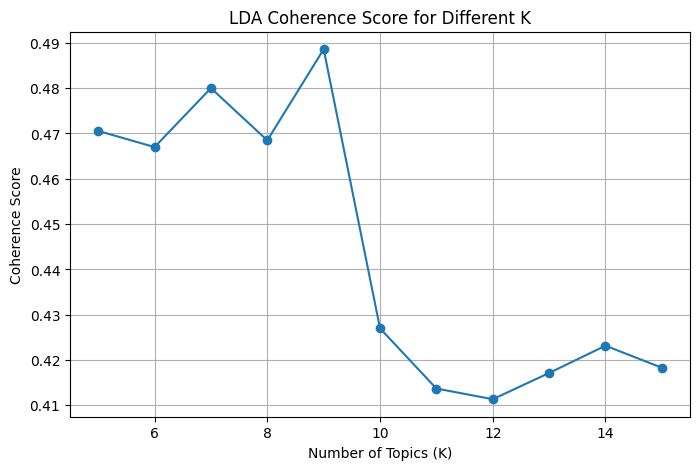


Best K based on coherence: 9


In [ ]:
# Plot coherence scores
k_vals, scores = zip(*coherence_scores)
plt.figure(figsize=(8, 5))
plt.plot(k_vals, scores, marker='o')
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("LDA Coherence Score for Different K")
plt.grid(True)
plt.show()

# Find best K
best_k = max(coherence_scores, key=lambda x: x[1])[0]
print(f"\nBest K based on coherence: {best_k}")


In [ ]:
# Train LDA model with best K
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=best_k, random_state=42)

# Print top keywords for each topic
topics = lda.show_topics(num_topics=best_k, num_words=10, formatted=False)

for idx, topic in topics:
    keywords = [word for word, prob in topic]
    print(f"Topic {idx+1}: {', '.join(keywords)}")


Topic 1: would, think, know, dont, like, people, program, much, time, file
Topic 2: would, maxaxaxaxaxaxaxaxaxaxaxaxaxaxax, time, drive, dont, also, make, know, year, like
Topic 3: drive, window, also, people, like, would, dont, time, system, file
Topic 4: maxaxaxaxaxaxaxaxaxaxaxaxaxaxax, would, think, time, make, even, dont, could, also, system
Topic 5: would, know, file, dont, also, people, like, time, available, could
Topic 6: like, dont, would, time, file, also, people, know, year, much
Topic 7: would, maxaxaxaxaxaxaxaxaxaxaxaxaxaxax, like, well, also, dont, people, think, know, make
Topic 8: would, like, time, people, know, dont, game, thing, even, good
Topic 9: file, maxaxaxaxaxaxaxaxaxaxaxaxaxaxax, also, people, would, dont, window, time, work, know


In [ ]:
#!pip install openai==0.28 # Downgrade to a compatible version

import openai

openai.api_key =
def gpt_topic_summary(keywords):
       prompt = f"Generate a short, meaningful summary for a topic based on these keywords: {', '.join(keywords)}"
       response = openai.ChatCompletion.create(
           model="gpt-3.5-turbo",
           messages=[{"role": "user", "content": prompt}],
           max_tokens=50
       )
       return response.choices[0].message.content.strip()



In [ ]:
# Generate summaries
print("\n=== GPT Summaries ===")
for idx, topic in topics:
    keywords = [word for word, prob in topic]
    summary = gpt_topic_summary(keywords)
    print(f"Topic {idx+1}: {summary}")

# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [ ]:
!pip install openai==0.27.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 0.28.0
    Uninstalling openai-0.28.0:
      Successfully uninstalled openai-0.28.0


In [ ]:
!pip install --upgrade jax jaxlib

In [ ]:
!pip install numpy==1.25.2 --force-reinstall


  Using cached numpy-1.25.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.25.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.


In [ ]:
import pandas as pd
import random
from sklearn.datasets import fetch_20newsgroups

# Load dataset and sample 2000 rows
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
sampled_data = random.sample(data.data, 2000)

# Convert to DataFrame
dataframe_3 = pd.DataFrame(sampled_data, columns=['text'])
print(dataframe_3.head())

                                                text
0  Hello,\n\n\tI'm the proud owner of an IBM AT w...
1  \nI read it. I found it wonderful. For some re...
2  \n\n\nActually, severe headaches due to stoppe...
3  \n\nWhile I agree with most of Jon says (I del...
4  I had the exactly same problem with my '70 Les...


In [ ]:
!pip install bertopic

In [ ]:

from sklearn.cluster import DBSCAN
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
embedding_model = SentenceTransformer("all-mpnet-base-v2")  # Or another model from the list above


In [ ]:
# Generate embeddings, accessing the 'text' column of the DataFrame
embeddings = embedding_model.encode(dataframe_3['text'].tolist(), show_progress_bar=True)

# Custom DBSCAN model
dbscan_model = DBSCAN(eps=0.3, min_samples=3, metric='cosine')

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [ ]:
from bertopic import BERTopic

In [ ]:
topic_model = BERTopic(
    embedding_model=embedding_model,
    hdbscan_model=dbscan_model,
    vectorizer_model=CountVectorizer(ngram_range=(1, 2)),
    verbose=True
)

# 5. Fit the model with embeddings
topics, probs = topic_model.fit_transform(dataframe_3['text'], embeddings)

In [ ]:
print(topic_model.get_topic_info())

# Show top keywords per topic
for topic_num in topic_model.get_topics().keys():
    print(f"Topic {topic_num}: {topic_model.get_topic(topic_num)}")
topic_info = topic_model.get_topic_info()
print(topic_info)
# Generate visualizations safely
topic_model.visualize_barchart(top_n_topics=5)


In [ ]:
embeddings = embedding_model.encode(dataframe_3['text'].tolist(), show_progress_bar=True)


In [ ]:
topic_model_default = BERTopic()
topics_default, _ = topic_model_default.fit_transform(dataframe_3['text'])

In [ ]:
topic_model_default.visualize_barchart(top_n_topics=5)

In [ ]:
print("\nTop Words per Topic (Default BERTopic):")
print(topic_model_default.get_topic_info())
for topic_num in topic_model_default.get_topics().keys():
    print(f"Topic {topic_num}: {topic_model_default.get_topic(topic_num)}")

print("\nTop Words per Topic (Custom BERTopic):")
print(topic_model.get_topic_info())
for topic_num in topic_model.get_topics().keys():
    print(f"Topic {topic_num}: {topic_model.get_topic(topic_num)}")


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

In [ ]:
# Write your code here

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:


I faced issue while re installing the libraries and u have faced issue while submitting the assignment and i faced issue while installing open ai and importing BERTTOPIC


'''